# SVR - Support Vector Machine for Regression

The main problem in regression tasks is to find a function that gets the better fitting, given a certain sequence of inputs, to the corresponding outputs in a determinate training dataset. In the SVR model, this activity means find the better equation for a hyperplane that includes de most points of the dataset in it's decision boundaries

In this notebook, an example of a SVR problem will be presented focused on predicing the Salary of an employee given a few independent variables.
DATASET: https://www.kaggle.com/rakeshrau/social-network-ads

#### More details about SVR

SVR is a type of Support vector machine that supports linear and non-linear regression. As it seems in the below picture, the main objective is to fit as many instances as possible between the lines while limiting the margin violatons.
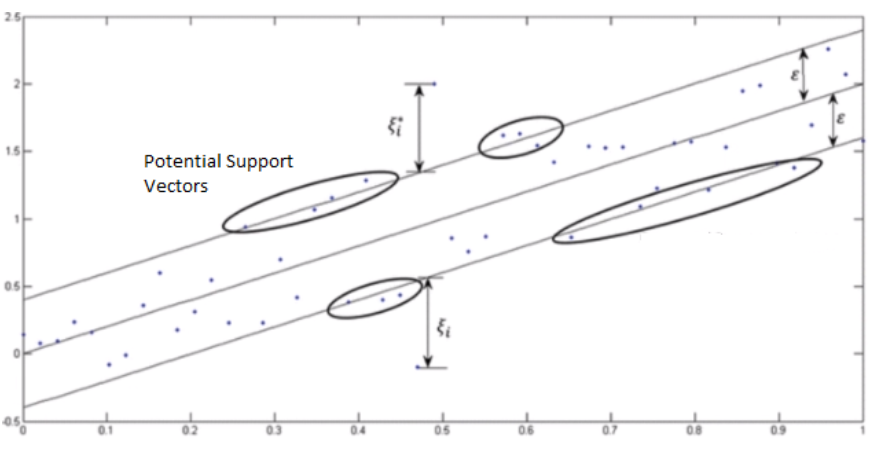

#### An Important Point Before Start

Standardization of datasets is a common requirement for many machone learning estimators, in other words, they performs better if the individual features looks like standard normally distibuted (with zero mean and unit variance).
This is done by removing the mean value of each feature, then scalling it by dividing non-constant features by their standard deviation.
For SVR in specific the RBF kernel function assume that all features are centered around zero and have variance inthe same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimatimator unable to learn from other features.

### Loading the Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

db = pd.read_csv('Position_Salaries.csv')
db.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Selecting Training Variables 

In [52]:
X = db.iloc[:,1:2].values.astype(float)
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [53]:
y = db.iloc[:,2:3].values.astype(float)
y

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

In [54]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_st = sc_X.fit_transform(X)
sc_y = StandardScaler()
y_st = sc_y.fit_transform(y)

for x,y in zip(X_st,y_st):
    print(x,y)

[-1.5666989] [-0.72004253]
[-1.21854359] [-0.70243757]
[-0.87038828] [-0.66722767]
[-0.52223297] [-0.59680786]
[-0.17407766] [-0.49117815]
[0.17407766] [-0.35033854]
[0.52223297] [-0.17428902]
[0.87038828] [0.17781001]
[1.21854359] [0.88200808]
[1.5666989] [2.64250325]


Text(0, 0.5, 'Std Salary')

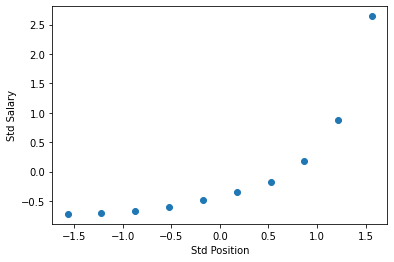

In [55]:
plt.scatter(X_st,y_st)
plt.xlabel("Std Position")
plt.ylabel("Std Salary")

#### RBF Kernel function (Radial Basis Function)

This function finds support vector regressors in infinite dimensions, where the amount of influence that one observation has on another is a function of squared distance. In other words the value that results from the kernel function is the relationship berween the two points in infinite-dimensions

The parameter gamma, which is determined by cross validation, scales the squared distance and thus scales the influence. In practice, the bigger is gamma, smaller will be the RBF result.

In general a Kernel function calculates the high-dimension relationship between two observations, the relationship will be close to 0 when observations are too far from each other.

#### Initializing model

In [56]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_st,y_st.ravel())

SVR()

#### Visualizing fit Results

Text(0, 0.5, 'Salary')

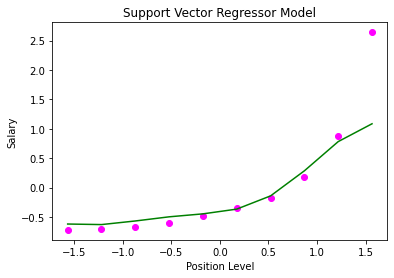

In [58]:
plt.scatter(X_st,y_st, color='magenta')
plt.plot(X_st,regressor.predict(X_st),color='green')
plt.title('Support Vector Regressor Model')
plt.xlabel('Position Level')
plt.ylabel('Salary')

NOTE: In the graph above, the point far in the upper right side is the CEO and the model take this data as an outlier 

### Predict a New Result

If We choose a random value between 0 and 10 (inside the range of position levels) the model can predict the employee salary.
First, the value needs to transformed by the same standard scale as the training model
After, we can make the prediction and to get the real predicted value it's needed to do an inverse trasnformation on the result by the training scaler of the y values.

In [61]:
x_pred = (sc_X.transform(np.array([[6.5]])))
y_pred = sc_y.inverse_transform(regressor.predict(x_pred))
y_pred

array([170370.0204065])